## ST

In [1]:
import os
import pandas as pd
import numpy as np
import scanpy as sc
import anndata as ad
import squidpy as sq
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pysodb

In [3]:
sc.set_figure_params(vector_friendly=False,format='pdf',transparent=True,dpi=50)
plt.rcParams["figure.figsize"] = (8, 8)

sns.set_style('white')

#### load data using pysodb

In [4]:
sodb = pysodb.SODB() # Initialization

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/urllib3-1.26.12-py3.9.egg/urllib3/connectionpool.py:1045: InsecureRequestWarning: Unverified HTTPS request is being made to host 'gene.ai.tencent.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/1.26.x/advanced-usage.html#ssl-warnings
  warnings.warn(


In [5]:
# this dataset is from publication "Visualization and analysis of gene expression in tissue sections by spatial transcriptomics"

In [6]:
# link in SODB: https://gene.ai.tencent.com/SpatialOmics/dataset?datasetID=22

In [7]:
adata = sodb.load_experiment('stahl2016visualization','Rep4_MOB_trans')
# the first parameter is the name of the dataset
# the second parameter is the name of one experiment in the dataset

load experiment[Rep4_MOB_trans] in dataset[stahl2016visualization] from /home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/pysodb-1.0.0-py3.9.egg/pysodb/cache/stahl2016visualization/Rep4_MOB_trans.h5ad


#### display clusters

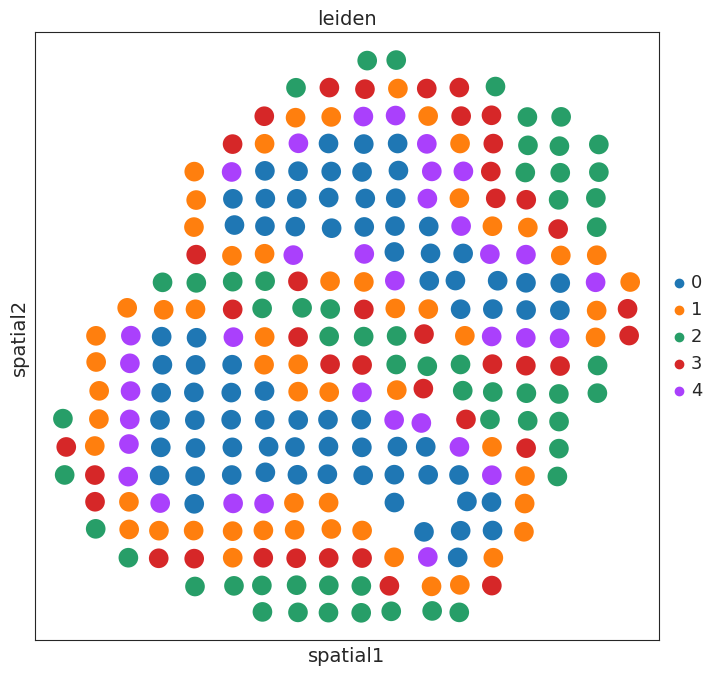

In [10]:
sc.pl.embedding(adata,basis='spatial',color='leiden',s=800)

#### Neighborhood enrichment

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/tqdm-4.64.1-py3.9.egg/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1000/1000 [00:00<00:00, 6509.39/s]
/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/squidpy-1.1.2-py3.9.egg/squidpy/pl/_graph.py:239: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = AnnData(X=array, obs={cluster_key: pd.Categorical(adata.obs[cluster_key].cat.c

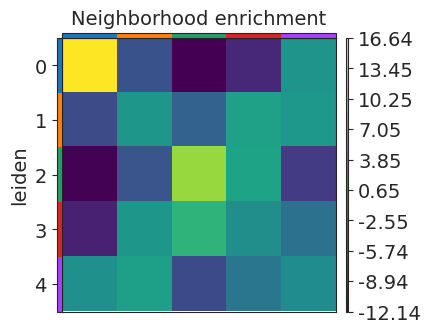

In [11]:
sq.gr.spatial_neighbors(adata)
sq.gr.nhood_enrichment(adata, cluster_key="leiden")
sq.pl.nhood_enrichment(adata, cluster_key="leiden")

#### Interaction matrix and network centralities

/home/yzy/anaconda3/envs/SODB/lib/python3.9/site-packages/squidpy-1.1.2-py3.9.egg/squidpy/pl/_graph.py:176: FutureWarning: X.dtype being converted to np.float32 from float64. In the next version of anndata (0.9) conversion will not be automatic. Pass dtype explicitly to avoid this warning. Pass `AnnData(X, dtype=X.dtype, ...)` to get the future behavour.
  ad = AnnData(X=array, obs={cluster_key: pd.Categorical(adata.obs[cluster_key].cat.categories)})


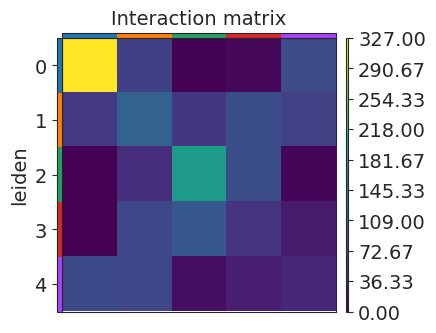

In [12]:
sq.gr.interaction_matrix(adata, cluster_key="leiden")
sq.pl.interaction_matrix(adata, cluster_key="leiden")

#### centrality score analysis

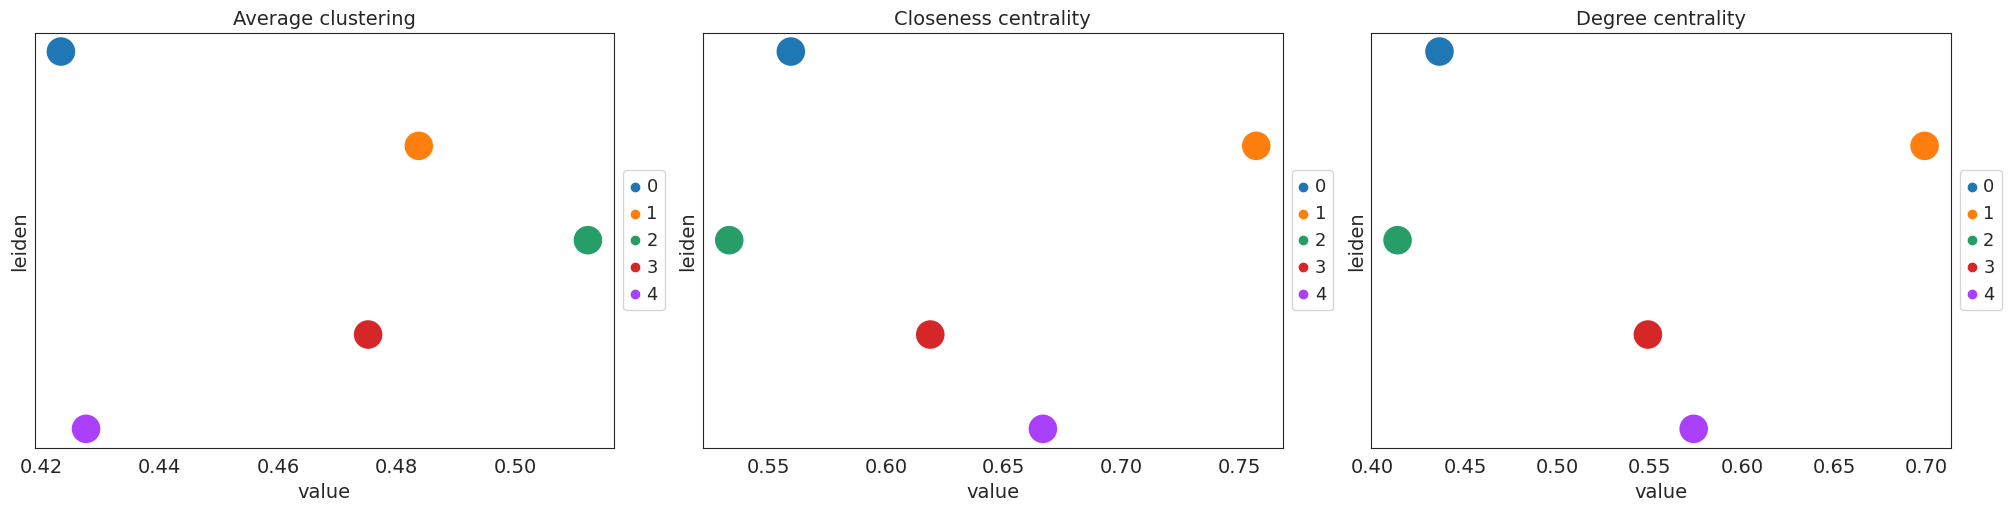

In [13]:
sq.gr.centrality_scores(
    adata,
    cluster_key="leiden",
)
sq.pl.centrality_scores(adata, cluster_key="leiden", figsize=(20, 5), s=500)